# Recap about the fundamentals of Deep Learning

📆 What's on the agenda for this recap?

- ***Intro***: How to read the docs
- ***Part 1️⃣***: Tensorflow de-mystified (👨🏻‍🏫 Teacher-led)
- ***Part 2️⃣***: Tensorflow vs Numpy? (👨🏻‍🏫 Teacher-led)
- ***Part 3️⃣***: Forest Fires Challenge (👩‍🎓 Student-led)

## Intro: How to read the docs?

✅ [Tensorflow.org](https://www.tensorflow.org/overview) provides you with two main pages to refer to:
- [Tutorial](https://www.tensorflow.org/tutorials)
- [Guide](https://www.tensorflow.org/guide)
- ***These should be your go-to pages***. You can even run `Colab-Notebooks` of these tutorials

&nbsp;

✅ TensorFlow [API docs](https://www.tensorflow.org/api_docs/python/tf/) contains only essential elements and advanced notions
- It pops up in Google Search in priority
- [Sometimes](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), it can give you references to related Tutorials or Guides
- ***Use it as THE single source of truth***

&nbsp;

❌ [Keras.io](https://keras.io/about/) is somewhat redundant with the TensorFlow documentation
- It contains nice tutorials and examples but...
- ...use it only you don't find what you need on `Tensorflow.Keras`'s website
- ***Don't use it for the docs***

# 1️⃣ - Tensorflow demystified 
_(🧑🏻‍🏫 Teacher-led)_

👉 Goal: Using Tensorflow, create a dummy dataset and fit a dummy model with it

### (1) Tensors?

📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

In [ ]:
# It's OK to import everything for notebook based experimentation!
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Tensors are wrappers around numpy objects

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

2022-02-07 17:50:09.828549: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
tf.ones((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
x = X.numpy()
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
# Tensors have a shape
X.shape

TensorShape([3, 3])

In [ ]:
# Tensors can be initialized from Numpy objects
tf.constant(x)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
# They can be manipulated with syntax that is similar to Numpy
tf.add(X,X)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [ ]:
# Conversely, Numpy also accept Tensor elements!
np.add(X,X)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [ ]:
# Example of a custom MSE loss function using Tensors

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))

loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0093473615>

#### Other Tensors?

**Sparse Tensors**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/sparse_tensors.png">

In [ ]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

TensorShape([3, 4])

**Ragged Tensors**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/ragged_tensors.png">

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

### (2) Build a neural network with `Sequential API`

👉 Let's generate 10 random observations `X` of 3 features each, and a unidimensional target `y` 

In [ ]:
# Let's generate 100 observations of with 10 features for each of them
X = tf.random.uniform((100,10))

In [ ]:
# And create our dummy target as simply the mean of each observation
y = tf.reduce_mean(X, axis=1)
y.shape

TensorShape([100])

👉 Let's build a simple dense model that "works"

In [ ]:
from tensorflow.keras import Sequential, layers

In [ ]:
# Usual syntax

model = Sequential()
model.add(layers.Dense(30, input_dim=10, activation='relu'))
#model.add(layers.Dense(30, input_shape=(10,), activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Equivalent
model = Sequential([
    layers.Dense(30, input_shape=(10, ), activation='relu'),
    layers.Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# What if we don't specify input_dim?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
try:
    model.summary()
    
except ValueError as e:
    print(e)

This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.


In [ ]:
# One can still access all the layers individually
model.layers

In [ ]:
# And call the layer with a "tensor" as input
x1 = model.layers[0](X)

# x1 is our activation from layer 1, with random (initial) weights
x1.shape

TensorShape([100, 30])

In [ ]:
# x2 is our output
x2 = model.layers[1](x1)
x2.shape

TensorShape([100, 1])

### (3) Keras Input layer

You will often encounter this in the docs:
```python
keras.Input(shape=(10,))
```
Instead of passing 100 **real** observations to your layers, simply pass a `keras.Input` of `None` observations of similar shape (10,).  

It is used for computation optimization purposes (memory pre-allocation and network graphs for parallelization) 

In [ ]:
inputs = keras.Input(shape=(10,))
inputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_1')>

In [ ]:
model.layers[0](inputs)

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_4')>

In [ ]:
x = model.layers[0](inputs) # Input layer
x = layers.Dense(30, activation='relu')(inputs) # First layer output
x = layers.Dense(20, activation='relu')(x) # Second layer output
x = layers.Dense(10, activation='relu')(x) # Third layer output
outputs = layers.Dense(1)(x)               # Final layer output

outputs.shape

TensorShape([None, 1])

In [ ]:
# Keras allows you to build a model from an input and output layer
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


☝️ This way of building models is called Keras [Functional API](https://www.tensorflow.org/guide/keras/functional)
- as opposed to [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): `model.add(...)`
- It is mandatory for complex (non-sequential) architecture...
- Used everywhere in the docs

# 2️⃣ - Tensorflow vs. Numpy?

### Difference between an array and a tensor?

👉 The important differences between NumPy arrays and tf.Tensors are:

1. Tensors are immutable
2. Tensors can be backed by accelerator memory (like GPU, TPU)

**Immutable**

In [ ]:
# an array element can be reassigned

array = np.array([1,1,1])

array[1] = 2

array

array([1, 2, 1])

In [ ]:
# a tensor element can't be reassigned

tensor = tf.constant([1., 1., 1.])

tensor[1] = 2

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Backed by accelerator memory**

Tensors are backed by accelerator memory (like GPU, TPU). You can manually select the processor on which to perform your tensor operations.

⏩⏩⏩ Check out the [documentation](https://www.tensorflow.org/guide/gpu).

In [ ]:
# Check CPU's available
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [ ]:
# Check GPU's available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


It is unliklely that your computer will have a GPU... Guess who offers free GPU usage? Google! 

👉 **Let's switch to Google Colab to continue the recap and compare the processing times.**

In [ ]:
# If you've set up Colab correctly, you should have a GPU avaiable.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Matrix multiplication function performing operation and returning us the time.
import time

def time_matmul(types,x):

    start = time.time() 

    if types=='numpy':
        np.matmul(x,x)

    else:
        tf.matmul(x,x)

    diff = time.time() - start

    return diff*1000


👇 Run this cell twice (the first time it runs, tensorflow compilation for GPU takes a bit of time)

In [ ]:
shape_dim = []
num_time = []
cpu_tf_time = []
gpu_tf_time = []

for shape in range(500,2001,100):

    print(f"Multiplication of shape [{shape},{shape}]")

  # Start with shape 500,500 to 2000,2000 with an increase of 100
    shape_dim.append(shape)

  # Numpy multiplication
    x_np = np.random.uniform(size=[shape,shape])
    num_time.append(time_matmul('numpy',x_np))
  
  #Tensor in CPU
    with tf.device("CPU:0"):
        x = tf.random.uniform([shape, shape])
        cpu_tf_time.append(time_matmul('cpu',x))
        
  #Tensor in GPU multiplication
    with tf.device("GPU:0"): #Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
        x = tf.random.uniform([shape, shape])
        gpu_tf_time.append(time_matmul('gpu',x))

print("Done multiplying!")

Multiplication of shape [500,500]
Multiplication of shape [600,600]
Multiplication of shape [700,700]
Multiplication of shape [800,800]
Multiplication of shape [900,900]
Multiplication of shape [1000,1000]
Multiplication of shape [1100,1100]
Multiplication of shape [1200,1200]
Multiplication of shape [1300,1300]
Multiplication of shape [1400,1400]
Multiplication of shape [1500,1500]
Multiplication of shape [1600,1600]
Multiplication of shape [1700,1700]
Multiplication of shape [1800,1800]
Multiplication of shape [1900,1900]
Multiplication of shape [2000,2000]
Done multiplying!


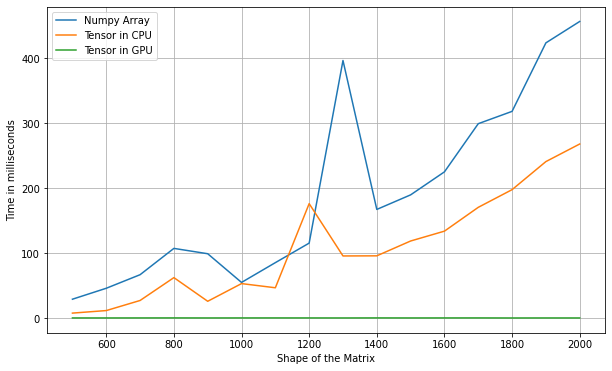

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(shape_dim, num_time, label="Numpy Array")
plt.plot(shape_dim, cpu_tf_time, label="Tensor in CPU")
plt.plot(shape_dim, gpu_tf_time, label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()

👉 **Check out our [tutorial](https://kitt.lewagon.com/knowledge/tutorials/data_google_colab) on how to set up Google Colab, you'll be using it in the coming days**

# 3️⃣ (optional) - Forest Fires Challenge 
(👩‍🎓Student-led)

### (1) Data

`tensorflow_dataset` provides many `Datasets` that can be found <a href="https://www.tensorflow.org/datasets/catalog/overview">here</a>

Let's load the **`forest_fires`** dataset. The target is area damaged by fire (more details here https://www.tensorflow.org/datasets/catalog/forest_fires).

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
area, features = tfds.as_numpy(tfds.load(
    'forest_fires',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

In [ ]:
X = pd.DataFrame(features).values
y = area
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y = area

### (2) Declare the general architecture of your model



❓ Import Keras and declare a Sequential model

In [ ]:
from tensorflow.keras import models

model = models.Sequential()

❓ Add a Dense layer with 50 neurons and the `relu` activation function. Do not forget to specify your `input_dim` for the first layer.

In [ ]:
from tensorflow.keras import layers

model.add(layers.Dense(50, input_dim=12, activation="relu"))

❓ Add a second fully connected layer, with 20 neurons and the `relu` activation function.

In [ ]:
model.add(layers.Dense(20, activation="relu"))

❓ Add a last layer that suits your regression task

In [ ]:
model.add(layers.Dense(1, activation="linear"))

❓ Check the number of parameters of your model.

Re-count them manually to make sure you understood the numbers of parameters involved in each layer of your Dense Neural Network

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                650       
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(12*50 + 50) + (50*20 + 20) + (20*1 + 1)

1691

### (3) Define how your model is trained
 


❓ Compile the model with the `adam` `optimizer` and the `mse` `loss`

In [ ]:
model.compile(optimizer='adam',
              loss='mse')

❓Run the model on this random data; don't forget to select a number of `epochs` and a `batch_size`. Store the returned result in `history`.

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size=16, 
                    epochs=2000,
                    verbose=0)

❓ Plot the model convergence

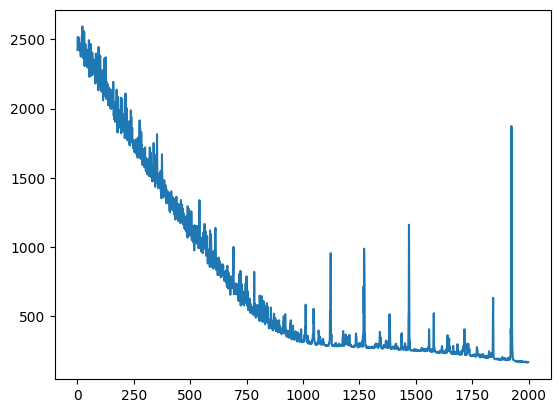

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

❓ Write an entire model with its compilation within an `init_model` function

In [ ]:
def init_model():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam',
              loss='mse')
    
    return model

You are advised to systematically rebuild a model (with an init function) before fitting some data in order to re-initialize the model's parameters.

The model you just wrote is suited for regression tasks.

What if we want to perform a binary classification task?

❓ Write another `init_model_2` function in which you will change:
* the last layer of the architecture 
* and the compilation method

used in a binary class classification problem.

In [ ]:
def init_model_2():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy')
    
    return model

❓ Write a last function to define a model for a classification problem with 10 classes.

In [ ]:
def init_model_3():
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy')
    
    return model